# RNA Visualization

Visualizing RNA-seq data from GSE62777 from the paper [Integrative Analyses of Human Reprogramming Reveal Dynamic Nature of Induced Pluripotency](https://www.sciencedirect.com/science/article/pii/S009286741500700X?via%3Dihub#app3).

In [1]:
library(ggplot2)
library(patchwork)
library(reshape2)

In [2]:
fpkm = read.table("/users/surag/kundajelab/scATAC-reprog/resources/GSE62777/RNAseq.FPKM.tsv", sep='\t', header=T)
fpkm$gene_id = NULL
fpkm$locus=NULL
fpkm[fpkm$gene_short_name=="GAPDH",]

,gene_short_name,hiF.T_P14,X2dd_DOX_plus,X5dd_DOX_plus,X8dd_DOX_plus,X10dd_DOX_plus_SSEA3_pos,X14dd_DOX_plus_SSEA3_pos,X20dd_DOX_plus_TRA_plus,X24dd_TRA_pos_DOX_plus,X24dd_TRA_pos_DOX_minus,hIPSC.T_P10
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3952,GAPDH,5370.09,2960.1,2450.69,2210.58,2203.93,2006.01,1885.05,2221.38,3309.17,2792.98


In [3]:
tpm = fpkm
tpm[,2:ncol(tpm)] = 1e6*t(t(tpm[,2:ncol(tpm)])/colSums(tpm[,2:ncol(tpm)]))
tpm[tpm$gene_short_name=="GAPDH",]

,gene_short_name,hiF.T_P14,X2dd_DOX_plus,X5dd_DOX_plus,X8dd_DOX_plus,X10dd_DOX_plus_SSEA3_pos,X14dd_DOX_plus_SSEA3_pos,X20dd_DOX_plus_TRA_plus,X24dd_TRA_pos_DOX_plus,X24dd_TRA_pos_DOX_minus,hIPSC.T_P10
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3952,GAPDH,7803.64,4963.505,3908.693,3839.776,3795.548,3364.503,3032.412,3790.955,5598.224,4731.256


In [4]:
gapdh_norm = tpm
gapdh_norm[,2:ncol(gapdh_norm)] = t(t(gapdh_norm[,2:ncol(gapdh_norm)])/as.numeric(as.vector(gapdh_norm[gapdh_norm$gene_short_name=="GAPDH",2:ncol(gapdh_norm)])))
gapdh_norm[gapdh_norm$gene_short_name=="GAPDH", ]

,gene_short_name,hiF.T_P14,X2dd_DOX_plus,X5dd_DOX_plus,X8dd_DOX_plus,X10dd_DOX_plus_SSEA3_pos,X14dd_DOX_plus_SSEA3_pos,X20dd_DOX_plus_TRA_plus,X24dd_TRA_pos_DOX_plus,X24dd_TRA_pos_DOX_minus,hIPSC.T_P10
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3952,GAPDH,1,1,1,1,1,1,1,1,1,1


## Plotting

In [5]:
gen_plot <- function(gene_mat, gene_name, ylabel) {
    p <- ggplot(melt(gene_mat)) +
    geom_line(aes(x=variable, y=value, col=gene_short_name, group=gene_short_name),size=1.5) +
    geom_point(aes(x=variable, y=value, col=gene_short_name, group=gene_short_name),size=3) +
    ylab(ylabel) + xlab("Sample") +
    theme_bw(base_size=14) +
    ggtitle(gene_name) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
    #      plot.background = element_blank(),
    plot.title = element_text(hjust = 0.5),
    panel.border = element_blank(),
    panel.grid.minor = element_blank())
    
    p
}

In [461]:
GENE = "^SMAD3$" # regex
# GENE = fpkm[sample(seq(1, nrow(fpkm)), 1),]$gene_short_name # sample one

In [462]:
gene_fpkm = fpkm[grep(GENE, fpkm$gene_short_name),]
gene_tpm = tpm[grep(GENE, tpm$gene_short_name),]
gene_gapdh = gapdh_norm[grep(GENE, gapdh_norm$gene_short_name),]

In [463]:
dim(gene_fpkm)

[1]  1 11

In [464]:
plot_fpkm = gen_plot(gene_fpkm, GENE, "FPKM")
plot_tpm = gen_plot(gene_tpm, GENE, "TPM")
plot_gapdh = gen_plot(gene_gapdh, GENE, "Relative to GAPDH")

Using gene_short_name as id variables

Using gene_short_name as id variables

Using gene_short_name as id variables



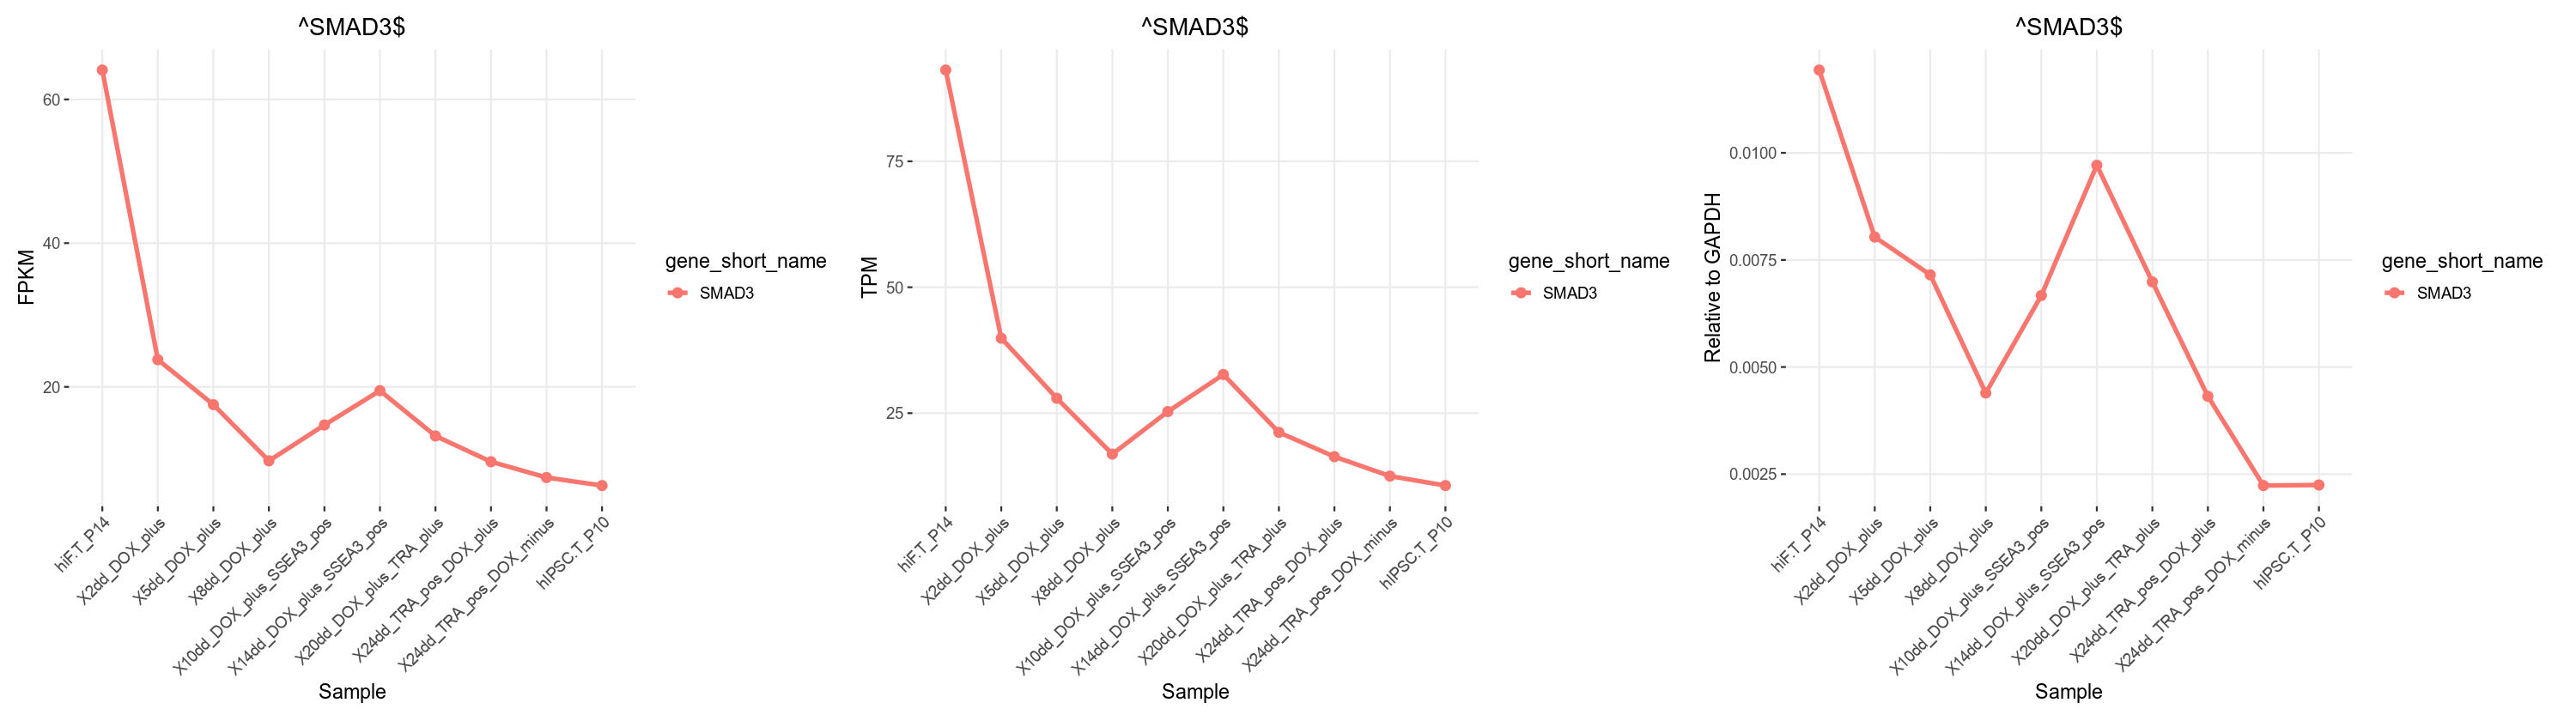

In [465]:
options(repr.plot.width = 25, repr.plot.height = 7)
plot_fpkm | plot_tpm | plot_gapdh

In [413]:
gene_tpm

,gene_short_name,hiF.T_P14,X2dd_DOX_plus,X5dd_DOX_plus,X8dd_DOX_plus,X10dd_DOX_plus_SSEA3_pos,X14dd_DOX_plus_SSEA3_pos,X20dd_DOX_plus_TRA_plus,X24dd_TRA_pos_DOX_plus,X24dd_TRA_pos_DOX_minus,hIPSC.T_P10
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9565,DST,132.7301,260.1963,246.8434,204.919,185.4746,129.7251,62.69623,60.12764,35.20085,36.95335


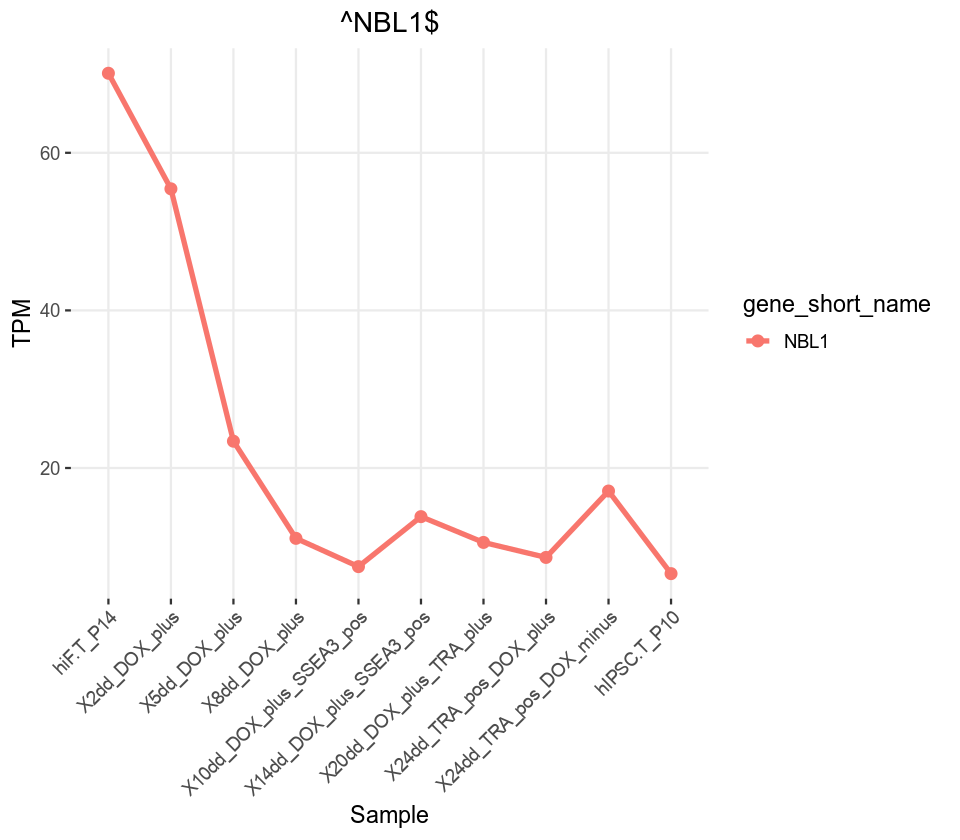

In [95]:
options(repr.plot.width = 8, repr.plot.height = 7)
plot_tpm